# Purpose: Do analytically integrable functional fits from 1750-2011 to radiative shielding for the negative of the radiative forcing from tropospheric ozone and for, anthropogenic aerosols, and black carbon on snow.

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
# import datetime
import matplotlib.pyplot as plt
import numpy as np
# import sympy as sp
from scipy.optimize import curve_fit
import csv
import scipy
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Forcings')

Read the specified input file

In [2]:
df1 = pd.read_excel('C:\\Users\\cd7\\Desktop\\Heat17Population\\heat19parameters16jul.xlsx')
df1.to_csv('heat19parameters16jul.csv',header=False,index=False)
df1 = pd.read_csv('heat19parameters16jul.csv')
df1.drop(df1.head(1).index, inplace=True)
df1.index = np.arange(0, len(df1))
df1.drop(df1.head(1).index, inplace=True)
df1.index = np.arange(0, len(df1))

df2 = pd.read_csv('OtherForcings.csv')
df2.drop(df2.tail(5).index,inplace=True) # drop last 5 rows
df2.index = np.arange(0, len(df2))
print (df2) 

     Year     CO2  GHG OTher*  O3 (Trop)  O3 (Strat)  Aerosol (Total)     LUC  \
0    1750  0.0000      0.0000     0.0000      0.0000           0.0000  0.0000   
1    1751 -0.0230      0.0040     0.0004      0.0000          -0.0018 -0.0004   
2    1752 -0.0237      0.0055     0.0008      0.0000          -0.0036 -0.0008   
3    1753 -0.0244      0.0070     0.0013      0.0000          -0.0054 -0.0012   
4    1754 -0.0250      0.0084     0.0017      0.0000          -0.0071 -0.0016   
5    1755 -0.0257      0.0099     0.0021      0.0000          -0.0089 -0.0020   
6    1756 -0.0264      0.0112     0.0025      0.0000          -0.0107 -0.0024   
7    1757 -0.0272      0.0125     0.0030      0.0000          -0.0125 -0.0028   
8    1758 -0.0279      0.0138     0.0034      0.0000          -0.0143 -0.0032   
9    1759 -0.0284      0.0149     0.0038      0.0000          -0.0161 -0.0036   
10   1760 -0.0288      0.0158     0.0042      0.0000          -0.0178 -0.0040   
11   1761 -0.0290      0.016

     O3 (Trop)
0       0.0000
1       0.0004
2       0.0008
3       0.0013
4       0.0017
5       0.0021
6       0.0025
7       0.0030
8       0.0034
9       0.0038
10      0.0042
11      0.0047
12      0.0051
13      0.0055
14      0.0059
15      0.0064
16      0.0068
17      0.0072
18      0.0076
19      0.0081
20      0.0085
21      0.0089
22      0.0093
23      0.0098
24      0.0102
25      0.0106
26      0.0110
27      0.0114
28      0.0119
29      0.0123
..         ...
232     0.3389
233     0.3432
234     0.3475
235     0.3517
236     0.3560
237     0.3603
238     0.3646
239     0.3689
240     0.3731
241     0.3746
242     0.3761
243     0.3775
244     0.3790
245     0.3804
246     0.3819
247     0.3833
248     0.3848
249     0.3862
250     0.3877
251     0.3889
252     0.3901
253     0.3914
254     0.3926
255     0.3938
256     0.3951
257     0.3963
258     0.3975
259     0.3988
260     0.4000
261     0.4000

[262 rows x 1 columns]


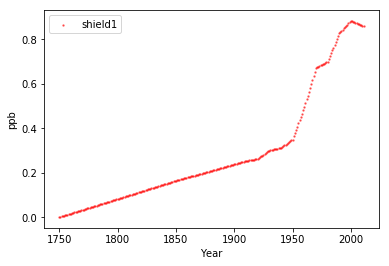

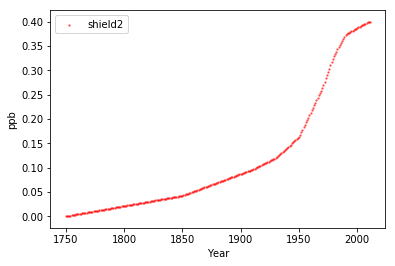

In [3]:
yrs = df2.iloc[:,0:1]
# print (yrs)
# print (type(yrs))
shield = df2.iloc[:,6:7]

shield = df2['Aerosol (Total)'] + df2['BC Snow']

shield = shield.multiply(-1)
# shield = -data2[[All, 7]]
# print (shield)


shield = shield.to_frame(name='Both')

# print (type(shield))
df3 = pd.merge(yrs, shield, left_index =True, right_index =True,how='outer')
df3 = df3.astype(float)
# print (df3)
df3.plot.scatter(x="Year", y="Both", color = 'r',label ='shield1', s=2, alpha = 0.5)
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('ppb') 
plt.savefig('bc1.eps',dpi=1000)
plt.savefig('bc1.pdf',dpi=1000)

o3force = df2.iloc[:,3:4]
print (o3force)
df4 = pd.merge(yrs, o3force, left_index =True, right_index =True,how='outer')
df4 = df4.astype(float)
df4.plot.scatter(x="Year", y="O3 (Trop)", color = 'r',label ='shield2', s=2, alpha = 0.5)
plt.ylabel('ppb') 
plt.savefig('bc2.eps',dpi=1000)
plt.savefig('bc2.pdf',dpi=1000)

Fitting